Importing the required modules

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


In [3]:
data = pd.read_csv('advertising.csv')

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
data.shape

(200, 4)

In [6]:
print(type(data))
print(data.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

Data Visualization

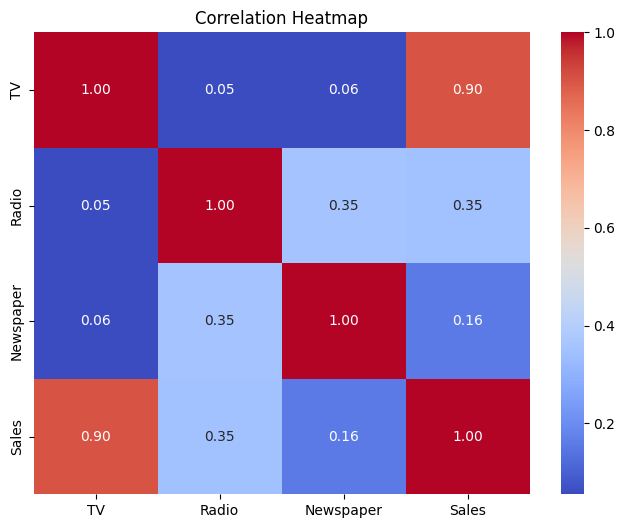

In [16]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


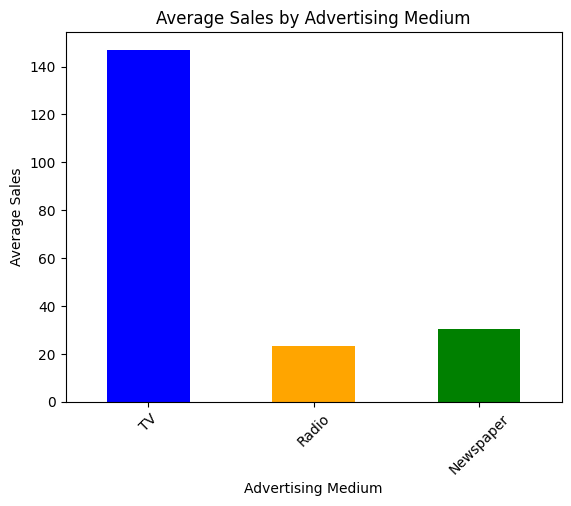

In [18]:
# Calculate average sales for each advertising medium
avg_sales = data[['TV', 'Radio', 'Newspaper']].mean()

# Bar plot of average sales
avg_sales.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.title('Average Sales by Advertising Medium')
plt.xlabel('Advertising Medium')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

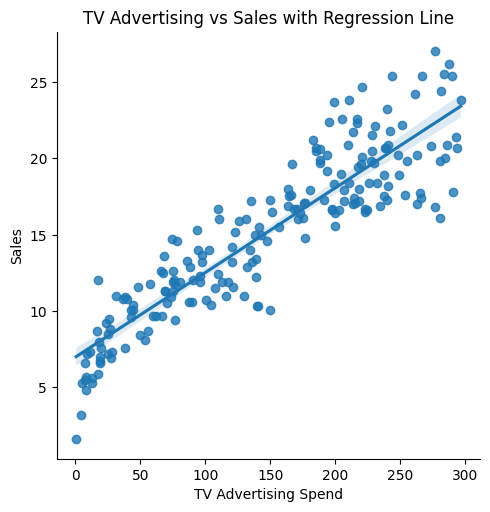

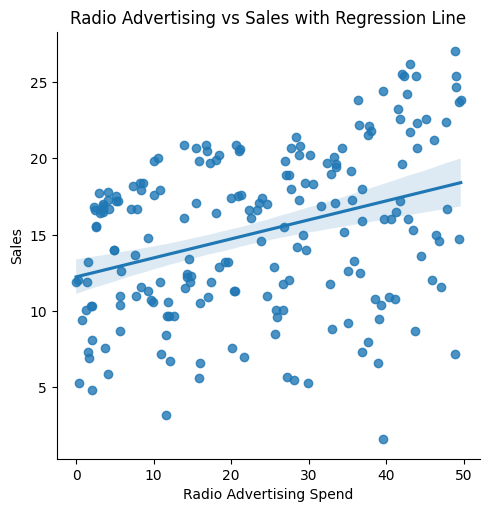

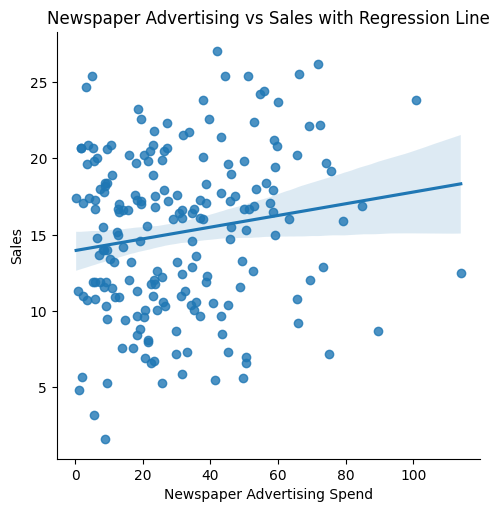

In [20]:
# Scatter plot with regression line for TV advertising vs Sales
sns.lmplot(x='TV', y='Sales', data=data)
plt.title('TV Advertising vs Sales with Regression Line')
plt.xlabel('TV Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Scatter plot with regression line for Radio advertising vs Sales
sns.lmplot(x='Radio', y='Sales', data=data)
plt.title('Radio Advertising vs Sales with Regression Line')
plt.xlabel('Radio Advertising Spend')
plt.ylabel('Sales')
plt.show()

# Scatter plot with regression line for Newspaper advertising vs Sales
sns.lmplot(x='Newspaper', y='Sales', data=data)
plt.title('Newspaper Advertising vs Sales with Regression Line')
plt.xlabel('Newspaper Advertising Spend')
plt.ylabel('Sales')
plt.show()


Model Building and Training

In [22]:
# Define features and target variable
X = data[['TV']]
y = data['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)
print(y_pred)

[16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [25]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Absolute Error: 1.9502948931650088
Mean Squared Error: 6.101072906773963
R² Score: 0.802561303423698


In [29]:
# Define bins and labels for categorizing sales
bins = [0, 10, 20, 30]
labels = ['Low', 'Medium', 'High']

# Create a new column for categorized sales
data['Sales_Category'] = pd.cut(data['Sales'], bins=bins, labels=labels)

X = data[['TV']]  # Use TV advertising as the feature
y = data['Sales_Category']  # Target variable is the categorized sales

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy Score: {accuracy}')
print('Classification Report:')
print(class_report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy Score: 0.7
Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.33      0.46         9
         Low       0.75      0.67      0.71         9
      Medium       0.68      0.86      0.76        22

    accuracy                           0.70        40
   macro avg       0.73      0.62      0.64        40
weighted avg       0.71      0.70      0.68        40

Confusion Matrix:
[[ 3  0  6]
 [ 0  6  3]
 [ 1  2 19]]


                                                        Thank You                                                                   .